In [2]:
import pandas as pd
import random
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('ratings_small.csv')
df = df[['userId', 'movieId', 'rating']]

A = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

A.head(2)


movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
erros = []
num_erros = 1000

while len(erros) < num_erros:
    i = random.randint(0, A.shape[0] - 1)
    j = random.randint(0, A.shape[1] - 1)
    
    if A.iloc[i, j] == 0:
        continue  
    
    valor_original = A.iloc[i, j]
    
    B = A.copy()
    B.iloc[i, j] = np.random.uniform(0, 5)
    
    U, sigma, VT = np.linalg.svd(B, full_matrices=False)
    
    sigma[-170:] = 0
    
    Sigma_modificada = np.diag(sigma)
    B_reconstruida = U @ Sigma_modificada @ VT
    
    valor_estimado = B_reconstruida[i, j]
    
    erro = abs(valor_original - valor_estimado)
    erros.append(erro)



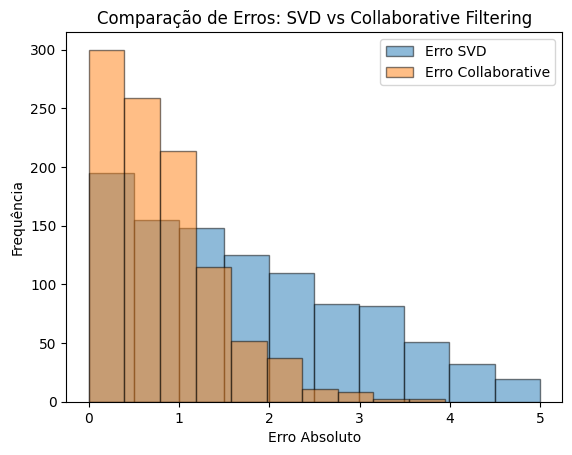

In [11]:
def collaborative_filtering(B, user, movie):
    avaliadores = B[:, movie] != 0
    return B[avaliadores, movie].mean() if avaliadores.any() else 0

erros_collab = []
while len(erros_collab) < num_erros:
    i = random.randint(0, A.shape[0] - 1)
    j = random.randint(0, A.shape[1] - 1)

    if A.iloc[i, j] == 0:
        continue
    
    valor_original = A.iloc[i, j]
    B = A.to_numpy()
    B[i, j] = np.random.uniform(0, 5)
    
    valor_estimado_collab = collaborative_filtering(B, i, j)
    erro_collab = abs(valor_original - valor_estimado_collab)
    erros_collab.append(erro_collab)

plt.hist(erros, bins=10, alpha=0.5, label='Erro SVD', edgecolor='k')
plt.hist(erros_collab, bins=10, alpha=0.5, label='Erro Collaborative', edgecolor='k')
plt.xlabel('Erro Absoluto')
plt.ylabel('Frequência')
plt.legend()
plt.title('Comparação de Erros: SVD vs Collaborative Filtering')
plt.show()
